# Ongoing exploration of p-value and confidence intervals from simulations.

In this notebook, I'm aiming to reproduce various bits of different published papers, and also some original hypothesis testing and exploratory simulations. The topic of meta-research is extremely interesting, and this notebook is a critical investigation into statistical tools and metrics that scientits use every day for decision-making purposes and evaluation of their results.

In [1]:
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from numpy import std, mean, sqrt
from scipy.stats import t
from meta_simulations import *


## Part 1. Generation of samples from simulated distributions. 

I'm aiming to generate random samples from different types of distribution, starting with gaussian one. This is because most of natural data is distributed normally, or (as you will see later on) approaches normality if sufficient large samples or number of samples are taken.

In [2]:
# This is the first method to generate a seed of 1000 values from a normal distribution with set parameters 
# The loop is iterating 1000 times and appending the random values with the random function/gauss method to an empty list

pop=[]
for i in range (1000):
    pop.append(random.gauss(0, 1))

# Here I make use of the numpy random.normal method to generate the same result

pop2 = np.random.normal(0.5, 1, 1000)
pop2 = list(pop2) #Here we have to transform the output of the np.random.normal method into a list, otherwise it won't be utilizable later on

### Plotting the data for visual proof

Here I needed the visual proof of normality. There are also statistical methods to assess a dataset for normality, but since we are talking about 1000 observation, visual proof will be more than enough.

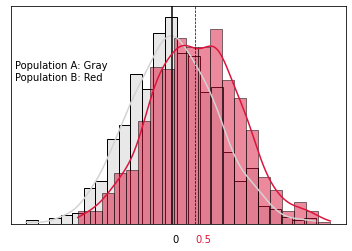

In [3]:
bins1 = sn.histplot(pop, color="lightgray", edgecolor="black", linewidth=1, kde=True)
plt.axvline(0,0,100,color="black")
bins1.axes.yaxis.set_visible(False)
bins1.axes.xaxis.set_visible(False)
plt.text(-3.5,80,'Population A: Gray\nPopulation B: Red',color="black")
plt.text(0,-10,'0',color="black")
plt.text(0.5,-10,'0.5',color="crimson")

bins2 = sn.histplot(pop2, color="crimson", edgecolor="black", linewidth=.5, kde=True)
plt.axvline(0.5,0,100,color="black", ls="dashed", lw=.7)

plt.savefig("popdistri.svg")

# Part 2: Creating the databases

This is the part where we call functions created in a separated .py file to create the databases through simulation. Count the p-values in the probability mass functions, and plot the graphs.

In [4]:
#Here instead we practically create 4 different dataframes with the simulation_p function

df10 = simulation_p(1000,1000,0,0.5,1,1,10,10)
df30 = simulation_p(1000,1000,0,0.5,1,1,30,30)
df60 = simulation_p(1000,1000,0,0.5,1,1,60,60)
df100 = simulation_p(1000,1000,0,0.5,1,1,100,100)


In [5]:
# Counting the number of p-values that are significative.

sig_values = pd.DataFrame({'Sign. values n10':[],'Sign. values n30':[], 'Sign. values n60':[], 'Sign. values n100':[]})
sig_values

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100


In [6]:
indexes = [0.5,0.1,0.05,0.01,0.001]

for values in indexes:
    sig_values.loc[values,:] = [counting_p(df10,values), counting_p(df30,values), counting_p(df60,values), counting_p(df100,values)]
    
sig_values

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100
0.500,671.0,813.0,993.0,999.0
0.100,264.0,441.0,899.0,990.0
0.050,166.0,311.0,839.0,978.0
0.010,54.0,137.0,620.0,911.0
0.001,8.0,33.0,305.0,723.0


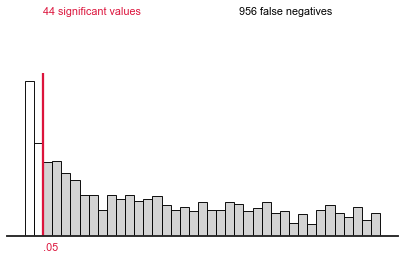

In [7]:
# plottling the same histogram with seaborn
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "figure.figsize":(7,3)}
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)


plimit = 0.05

g = sn.histplot(x='p-value', data=df10, color="#FFF", edgecolor="black", bins=39)
plt.axvline(0.05, 0,1, color="Crimson")
plt.text(.05,150,'44 significant values', color="Crimson")
plt.text( .6,150,'956 false negatives', color="black")
plt.text(.05,-9.15,'.05',rotation=0, color="Crimson")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= plimit:
        rectangle.set_facecolor('LightGrey')
        


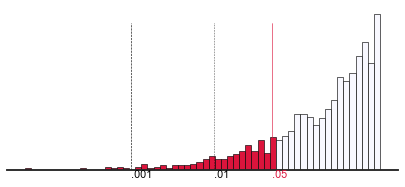

In [8]:
#plotting the same graph with sample size 10 but in a log10 scale

histogram_distribution(df10)
plt.savefig("ttest10samples.svg")

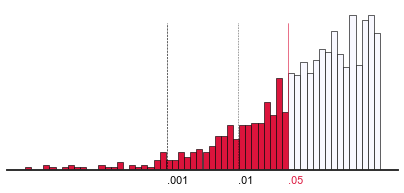

In [9]:
# Same Graph but for the 30 sample sizes

histogram_distribution(df30)        
plt.savefig("ttest30samples.svg")

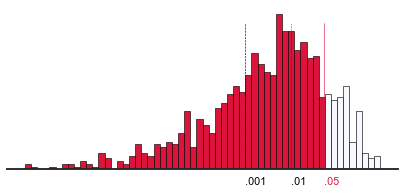

In [10]:
# Same Graph but for the 60 sample sizes

histogram_distribution(df60)
plt.savefig("ttest60samples.svg")

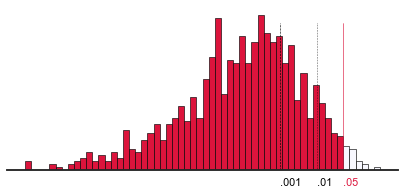

In [11]:
# Same Graph but for the 100 sample sizes

histogram_distribution(df100)
plt.savefig("ttest100samples.svg")

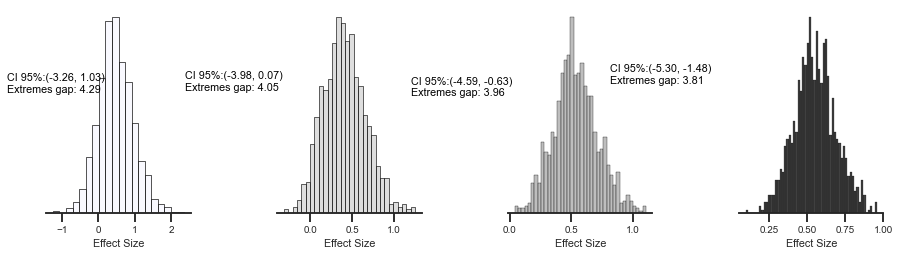

In [12]:
# Adjusting again the aesthetic paramethers of the seaborn theme to have a different result.
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False}
sn.set_theme(context='talk', style='ticks', font='sans-serif', font_scale=.6, rc=custom_params)

intervals = plt.figure(figsize=[15,3.8])
intervals.subplots_adjust(hspace=0.4, wspace=.6)
#This is the first graph of the grid
ax = intervals.add_subplot(1,4,1)
sn.histplot(data=df10, x="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
ax.axes.yaxis.set_visible(False)
plt.text(-2.5,100,'CI 95%:(-3.26, 1.03)\nExtremes gap: 4.29', color="black")
#This is the second graph of the grid
ax = intervals.add_subplot(1,4,2)
sn.histplot(data=df30, x="Effect Size", color="LightGray", edgecolor="black", lw=.6, bins=30)
ax.axes.yaxis.set_visible(False)
plt.text(-1.5,55,'CI 95%:(-3.98, 0.07)\nExtremes gap: 4.05', color="black")
#This is the third graph of the grid
ax = intervals.add_subplot(1,4,3)
sn.histplot(data=df60, x="Effect Size", color="DarkGray", edgecolor="black", bins=40)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,46,'CI 95%:(-4.59, -0.63)\nExtremes gap: 3.96', color="black")
#This is the fourth graph of the grid
ax = intervals.add_subplot(1,4,4)
sn.histplot(data=df100, x="Effect Size", color="Black", edgecolor="black", bins=58)
ax.axes.yaxis.set_visible(False)
plt.text(-0.8,35,'CI 95%:(-5.30, -1.48)\nExtremes gap: 3.81', color="black")

plt.savefig('CIgrid.svg')

In [13]:
#Just printing out some values that I need for the next graph.

log10_p = np.log10(0.05)
avg_gap10 = np.mean(df10['.95 Gap'])
avg_gap30 = np.mean(df30['.95 Gap'])
avg_gap60 = np.mean(df60['.95 Gap'])
avg_gap100 = np.mean(df100['.95 Gap'])

print(log10_p,avg_gap10,avg_gap30,avg_gap60,avg_gap100)

-1.3010299956639813 1.6075281707691444 0.9809977902396982 0.7047365980745537 0.5593197333741678


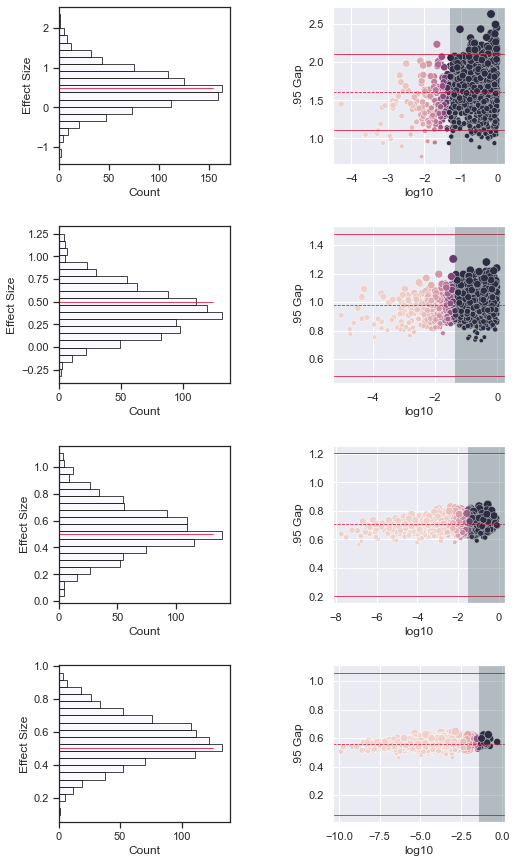

In [14]:
# Visualization of the distribution of p-values and effect sizes


density = plt.figure(figsize=[8,15])
density.subplots_adjust(hspace=0.4, wspace=.6)
#Graph number 1 histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,1)
sn.histplot(data=df10, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 2 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,2)
sn.scatterplot(data=df10, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap10, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap10+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap10-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.55, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 3 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,3)
sn.histplot(data=df30, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 4 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,4)
sn.scatterplot(data=df30, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap30, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap30+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap30-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.50, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 5 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,5)
sn.histplot(data=df60, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 6 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,6)
sn.scatterplot(data=df60, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap60, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap60+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap60-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.45, 0, 1, color="DarkSlateGray", lw=45, alpha=.3)
#Graph number 7 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,7)
sn.histplot(data=df100, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 8 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,8)
sn.scatterplot(data=df100, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap100, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap100+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap100-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.35, 0, 1, color="DarkSlateGray", lw=35, alpha=.3)

plt.savefig('bigGreed.svg')

## Critique part: confidence intervals estimation with different sample sizes

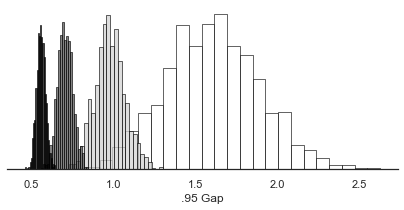

In [15]:
# Displaying the gap in the 95% CI at various sample sizes

sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10, x='.95 Gap', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30, x='.95 Gap', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60, x='.95 Gap', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100, x='.95 Gap', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

plt.savefig('gaps.svg')

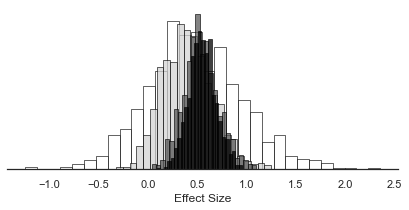

In [16]:
# Just a different way to display the narrowing of the confidence intervals. 
sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10, x='Effect Size', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30, x='Effect Size', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60, x='Effect Size', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100, x='Effect Size', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

plt.savefig('centrality.svg')

# Part 2: sampling for the same population.
### Null hypothesis being true

In [17]:
df10e = simulation_p(1000,1000,0,0,1,1,10,10)
df30e = simulation_p(1000,1000,0,0,1,1,30,30)
df60e = simulation_p(1000,1000,0,0,1,1,60,60)
df100e = simulation_p(1000,1000,0,0,1,1,100,100)

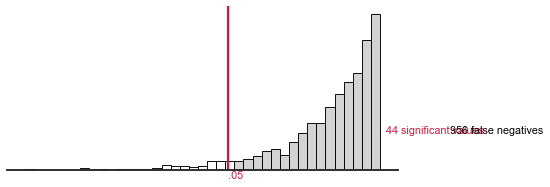

In [18]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "figure.figsize":(7,3)}
sn.set_theme(context='talk', style='white', font='sans-serif', font_scale=.6, rc=custom_params)

g = sn.histplot(x='log10', data=df30e, color="#FFF", edgecolor="black", bins=39)
plt.axvline(-1.3, 0,1, color="Crimson")
plt.text(.05,40,'44 significant values', color="Crimson")
plt.text( .6,40,'956 false negatives', color="black")
plt.text(-1.3,-9.15,'.05',rotation=0, color="Crimson")
g.axes.yaxis.set_visible(False)
g.axes.xaxis.set_visible(False)

for rectangle in g.patches:
    if rectangle.get_x() >= -1.3:
        rectangle.set_facecolor('LightGrey')

In [19]:
# Counting the number of p-values that are significative.

sig_values_e = pd.DataFrame({'Sign. values n10':[],'Sign. values n30':[], 'Sign. values n60':[], 'Sign. values n100':[]})


indexes = [0.5,0.1,0.05,0.01,0.001]

for values in indexes:
    sig_values_e.loc[values,:] = [counting_p(df10e,values), counting_p(df30e,values), counting_p(df60e,values), counting_p(df100e,values)]
    
sig_values_e

,Sign. values n10,Sign. values n30,Sign. values n60,Sign. values n100
0.500,488.0,494.0,491.0,499.0
0.100,78.0,97.0,87.0,95.0
0.050,43.0,50.0,51.0,43.0
0.010,9.0,7.0,7.0,5.0
0.001,0.0,1.0,0.0,2.0


In [20]:
#Just printing out some values that I need for the next graph.

log10_p = np.log10(0.05)
avg_gap10e = np.mean(df10e['.95 Gap'])
avg_gap30e = np.mean(df30e['.95 Gap'])
avg_gap60e = np.mean(df60e['.95 Gap'])
avg_gap100e = np.mean(df100e['.95 Gap'])

print(log10_p,avg_gap10,avg_gap30,avg_gap60,avg_gap100)

-1.3010299956639813 1.6075281707691444 0.9809977902396982 0.7047365980745537 0.5593197333741678


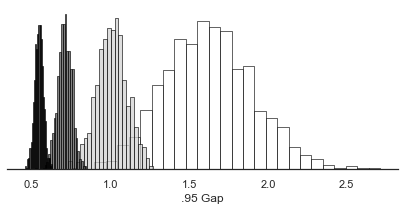

In [21]:
# Displaying the gap in the 95% CI at various sample sizes

sn.set_theme(style="white", rc=custom_params)
tr=sn.histplot(data=df10e, x='.95 Gap', color="white", edgecolor="black", linewidth=.6)
sn.histplot(data=df30e, x='.95 Gap', color="lightgray", edgecolor="black", linewidth=.6)
sn.histplot(data=df60e, x='.95 Gap', color="#595959", edgecolor="black", linewidth=.6)
sn.histplot(data=df100e, x='.95 Gap', color="black", edgecolor="black", linewidth=.6)
tr.axes.yaxis.set_visible(False)

plt.savefig('gaps_e.svg')

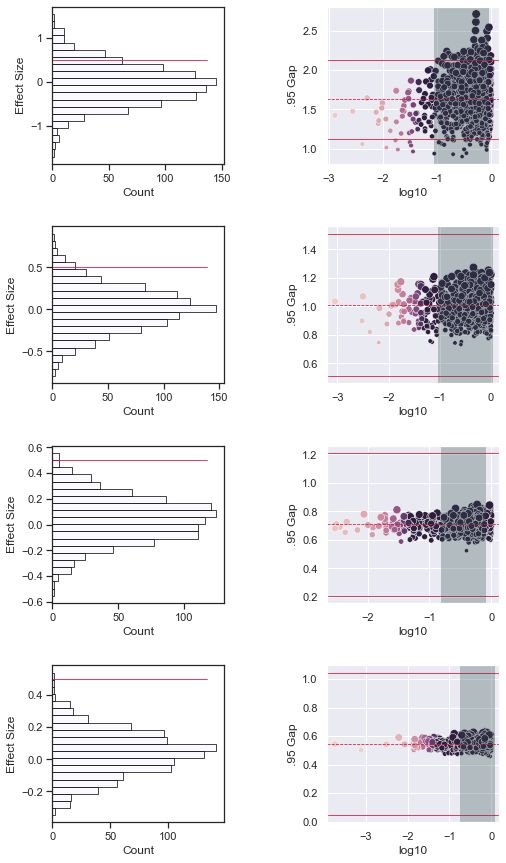

In [22]:
# Visualization of the distribution of p-values and effect sizes


density = plt.figure(figsize=[8,15])
density.subplots_adjust(hspace=0.4, wspace=.6)
#Graph number 1 histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,1)
sn.histplot(data=df10e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 2 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,2)
sn.scatterplot(data=df10e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap10e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap10e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap10e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.55, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 3 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,3)
sn.histplot(data=df30e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 4 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,4)
sn.scatterplot(data=df30e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap30e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap30e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap30e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.50, 0, 1, color="DarkSlateGray", lw=55, alpha=.3)
#Graph number 5 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,5)
sn.histplot(data=df60e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 6 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,6)
sn.scatterplot(data=df60e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap60e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap60e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap60e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.45, 0, 1, color="DarkSlateGray", lw=45, alpha=.3)
#Graph number 7 should be a histogram
sn.set_theme(style="ticks")
ay = density.add_subplot(4,2,7)
sn.histplot(data=df100e, y="Effect Size", color="GhostWhite", edgecolor="black", bins=20)
plt.axhline(0.5, 0,.9, color="Crimson", lw=.8)
#Graph number 8 should be a density plot
sn.set_theme(style="darkgrid")
ay = density.add_subplot(4,2,8)
sn.scatterplot(data=df100e, x="log10", y=".95 Gap", hue="p-value", size=".95 Gap", hue_norm=(0, 0.05), legend=False)
plt.axhline(avg_gap100e, 0, 1, color="Crimson", lw=.8, ls="dashed")
plt.axhline((avg_gap100e+0.5), 0, 1, color="Crimson", lw=.8)
plt.axhline((avg_gap100e-0.5), 0, 1, color="Crimson", lw=.8)
plt.axvline(-0.35, 0, 1, color="DarkSlateGray", lw=35, alpha=.3)

<AxesSubplot:xlabel='log10', ylabel='Count'>

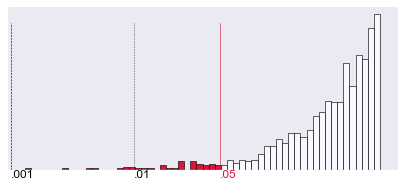

In [23]:
#Histogram distribution when sampling population is the same


histogram_distribution(df10e)

<AxesSubplot:xlabel='log10', ylabel='Count'>

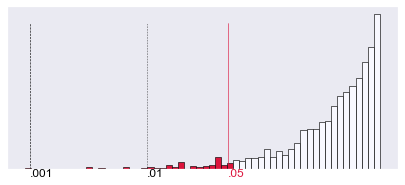

In [24]:
histogram_distribution(df30e)

<AxesSubplot:xlabel='log10', ylabel='Count'>

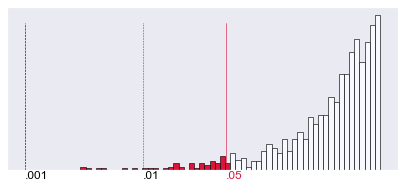

In [25]:
histogram_distribution(df60e)

<AxesSubplot:xlabel='log10', ylabel='Count'>

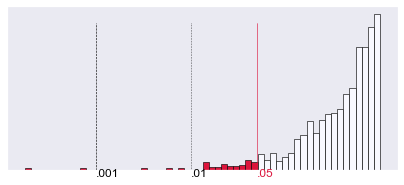

In [26]:
histogram_distribution(df100e)

### Conclusion comments

The simulation succesfully showed how the p-values behave differently in the two different scenarios. The two scenarios are what, in theory, it is epistemologically true (either you sample from the same population, or from two different populations). However, the analysis here does not account for a lot of different scenarios that could manage to create noise in the readings (from actors bad practices to measuring tools defects).

It has been shown, that a collection of confidence intervals, indeed shows precision (not a singular CI, but a collection of repeating CIs). It has also been shown that given a true effect, p-value is the worst metric to assess its epistemological nature.